In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [121]:
# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

In [122]:
df = pd.read_csv("data/20200124_is24_buyrent_plus_lieferando.csv", sep=";")
df.head(3).transpose()

0  \
Unnamed: 0                                                             0   
city                                                              Berlin   
hasCourtage                                                           NO   
houseNo                                                               13   
id                                                             115408865   
latitude                                                         52.5504   
longitude                                                        13.2143   
marketingType                                                   PURCHASE   
n_page_is24                                                            1   
n_room                                                                 4   
postcode                                                           13585   
privateOffer                                                       False   
purchase_price                                                    705000   
purchase_price_per_qm                                             6752.9   
qm                                                                 104.4   
quarter                                                Spandau (Spandau)   
rent_cold                                                            NaN   
rent_cold_per_qm                                                     NaN   
street                                                        Parkstraße   
title                  Ein hohes Maß an Komfort! Dachgeschoss-Maisone...   
n_restaurant                                                          82   

                                                                       1  \
Unnamed: 0                                                             1   
city                                                              Berlin   
hasCourtage                                                           NO   
houseNo                                                               13   
id                                                             115408859   
latitude                                                         52.5504   
longitude                                                        13.2143   
marketingType                                                   PURCHASE   
n_page_is24                                                            1   
n_room                                                                 4   
postcode                                                           13585   
privateOffer                                                       False   
purchase_price                                                    703000   
purchase_price_per_qm                                             6756.4   
qm                                                                104.05   
quarter                                                Spandau (Spandau)   
rent_cold                                                            NaN   
rent_cold_per_qm                                                     NaN   
street                                                        Parkstraße   
title                  Dachgeschoss-Maisonette-Wohnung mit Ausblick a...   
n_restaurant                                                          82   

                                                                       2  
Unnamed: 0                                                             2  
city                                                              Berlin  
hasCourtage                                                           NO  
houseNo                                                               13  
id                                                             115408828  
latitude                                                         52.5504  
longitude                                                        13.2143  
marketingType                                                   PURCHASE  
n_page_is24                                       

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 21 columns):
Unnamed: 0               10015 non-null int64
city                     10015 non-null object
hasCourtage              6740 non-null object
houseNo                  6416 non-null object
id                       10015 non-null int64
latitude                 6363 non-null float64
longitude                6363 non-null float64
marketingType            10015 non-null object
n_page_is24              10015 non-null int64
n_room                   10015 non-null float64
postcode                 10015 non-null int64
privateOffer             10015 non-null bool
purchase_price           6740 non-null float64
purchase_price_per_qm    6734 non-null float64
qm                       10015 non-null float64
quarter                  10015 non-null object
rent_cold                3275 non-null float64
rent_cold_per_qm         3275 non-null float64
street                   6416 non-null object
title

In [124]:
df = df[df["marketingType"] == "RENT"]

In [125]:
df["price_per_qm"] = df["purchase_price_per_qm"] 
df.price_per_qm.fillna(df.rent_cold_per_qm, inplace=True)

In [126]:
[[column, df[column].count() / len(df)] for column in df if df[column].count() / len(df) >= 0.3]

[['Unnamed: 0', 1.0],
 ['city', 1.0],
 ['houseNo', 0.8549618320610687],
 ['id', 1.0],
 ['latitude', 0.8412213740458016],
 ['longitude', 0.8412213740458016],
 ['marketingType', 1.0],
 ['n_page_is24', 1.0],
 ['n_room', 1.0],
 ['postcode', 1.0],
 ['privateOffer', 1.0],
 ['qm', 1.0],
 ['quarter', 1.0],
 ['rent_cold', 1.0],
 ['rent_cold_per_qm', 1.0],
 ['street', 0.8549618320610687],
 ['title', 1.0],
 ['n_restaurant', 0.9960305343511451],
 ['price_per_qm', 1.0]]

In [127]:
print(df['price_per_qm'].describe())

count    3275.000000
mean       15.302626
std         6.641701
min         5.100000
25%        10.800000
50%        14.000000
75%        18.200000
max        76.200000
Name: price_per_qm, dtype: float64


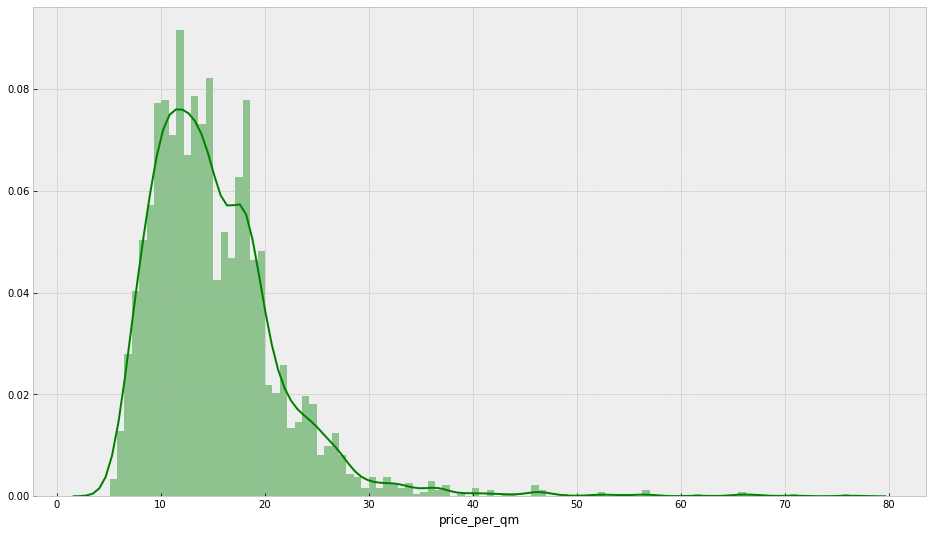

In [128]:
plt.figure(figsize=(16, 9))
sns.distplot(df['price_per_qm'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [129]:
list(set(df.dtypes.tolist()))

[dtype('bool'), dtype('O'), dtype('int64'), dtype('float64')]

In [130]:
df_num = df.select_dtypes(include = ['float64', 'int64'])

In [131]:
df_num.columns

Index(['Unnamed: 0', 'id', 'latitude', 'longitude', 'n_page_is24', 'n_room',
       'postcode', 'purchase_price', 'purchase_price_per_qm', 'qm',
       'rent_cold', 'rent_cold_per_qm', 'n_restaurant', 'price_per_qm'],
      dtype='object')

In [132]:
df_num = df[['n_room', 'qm', 'n_restaurant', 'price_per_qm']]

In [133]:
df_descr = df_num.describe().transpose()

In [134]:
df_descr = df_descr[["25%","75%"]].assign(IQR=df_descr["75%"] - df_descr["25%"])

In [135]:
df_descr

25%      75%    IQR
n_room         2.000    3.000    1.0
qm            53.345   97.045   43.7
n_restaurant  85.000  269.000  184.0
price_per_qm  10.800   18.200    7.4

In [136]:
# 1. create new empty DataFrame df_outliers with the same columns
df_outliers = pd.DataFrame(columns=df_num.columns)

# 2. iterate over all numerical columns
for num_col in df_descr.index:
    iqr = df_descr.loc[num_col, "IQR"]
    
    # 3. set tolerance factor and calculate cutoff
    t_factor = 3
    cutoff = iqr * t_factor
    
    # 4. set lower and upper threshold
    lower_threshold = df_descr.loc[num_col, "25%"] - cutoff
    upper_threshold = df_descr.loc[num_col, "75%"] + cutoff
    
    # 5. identify outliers and mark in outliers column
    df_num[num_col + "_outlier"] = df_num[num_col].lt(lower_threshold) | df_num[num_col].gt(upper_threshold)

/home/psmorelli/anaconda3/envs/code_red/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [137]:
df_num = df_num[(df_num["n_room_outlier"] == False) & (df_num["qm_outlier"] == False) & (df_num["n_restaurant_outlier"] == False) & (df_num["price_per_qm_outlier"] == False)]

In [138]:
df_num = df_num.drop (columns=["n_room_outlier","qm_outlier","n_restaurant_outlier","price_per_qm_outlier"])

In [139]:
df_num

n_room      qm  n_restaurant  price_per_qm
6740      2.0   60.52          87.0           8.2
6741      4.0  112.67          82.0           9.0
6742      2.0   65.46          75.0           8.1
6743      3.0   89.15          29.0          13.0
6744      2.0   66.61          29.0          12.0
...       ...     ...           ...           ...
10010     1.0   35.38         121.0          12.6
10011     3.0   86.00         311.0          20.6
10012     3.0   84.00          66.0           9.3
10013     3.0   83.50          29.0           6.7
10014     2.0   52.70          93.0           8.8

[3202 rows x 4 columns]

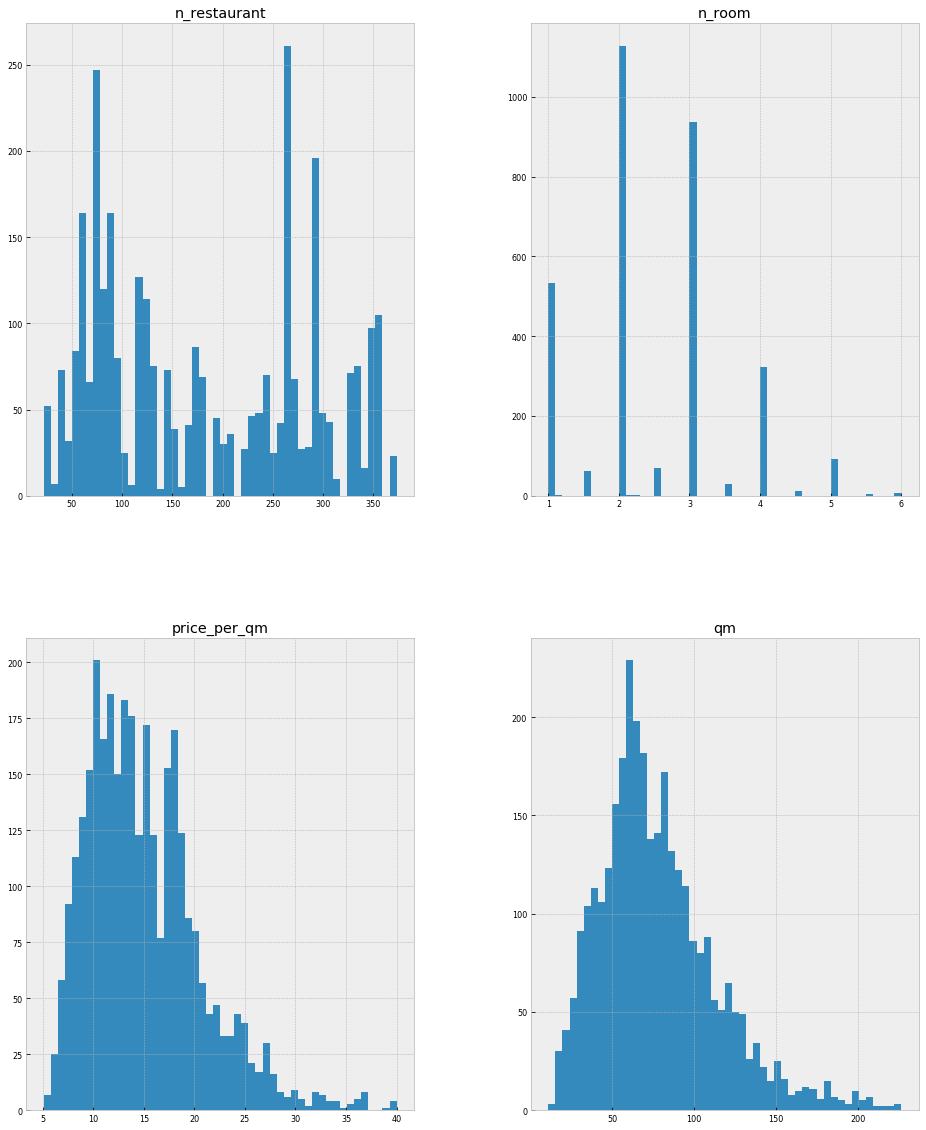

In [140]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

In [141]:
df_num_corr = df_num.corr()['price_per_qm'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0].sort_values(ascending=False)
print("There is {} strongly correlated values with price_per_qm:\n{}".format(len(golden_features_list), golden_features_list))

There is 3 strongly correlated values with price_per_qm:
n_restaurant    0.571429
qm             -0.078982
n_room         -0.099610
Name: price_per_qm, dtype: float64


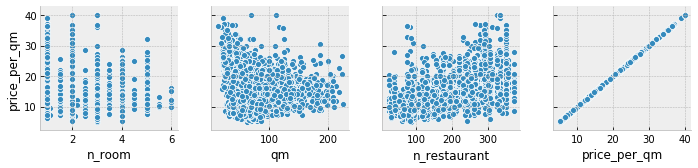

In [142]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['price_per_qm'])

In [143]:
import operator

individual_features_df = []
for i in range(0, len(df_num.columns) - 1): # -1 because the last column is SalePrice
    tmpDf = df_num[[df_num.columns[i], 'price_per_qm']]
    tmpDf = tmpDf[tmpDf[df_num.columns[i]] != 0]
    individual_features_df.append(tmpDf)

all_correlations = {feature.columns[0]: feature.corr()['price_per_qm'][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))

n_room: -0.09961013837072608
             qm: -0.07898179640624743
   n_restaurant: 0.5714290423516858


In [144]:
golden_features_list = [key for key, value in all_correlations if abs(value) >= 0]
print("There is {} strongly correlated values with price_per_qm:\n{}".format(len(golden_features_list), golden_features_list))

There is 3 strongly correlated values with price_per_qm:
['n_room', 'qm', 'n_restaurant']


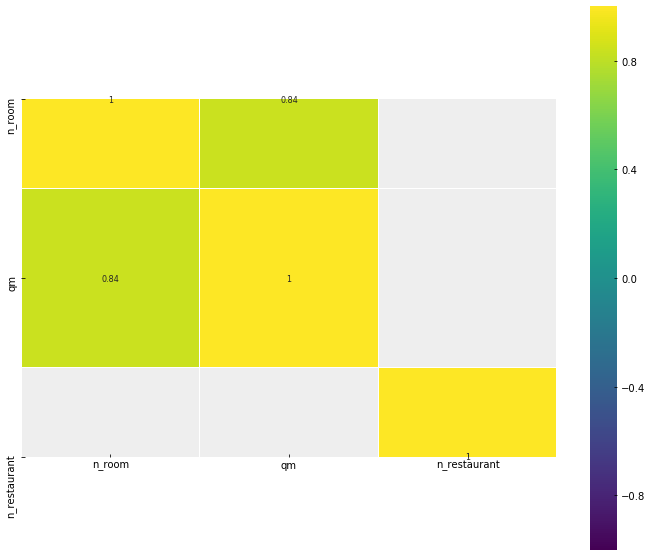

In [145]:
corr = df_num.drop('price_per_qm', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [146]:
features_to_analyse = [x for x in df_num.columns if x in golden_features_list]
features_to_analyse.append('price_per_qm')
features_to_analyse

['n_room', 'qm', 'n_restaurant', 'price_per_qm']

In [150]:
sns.regplot(x=features_to_analyse[i],y='price_per_qm', data=df_num['n_restaurant'], ax=ax)

KeyError: 'n_restaurant'

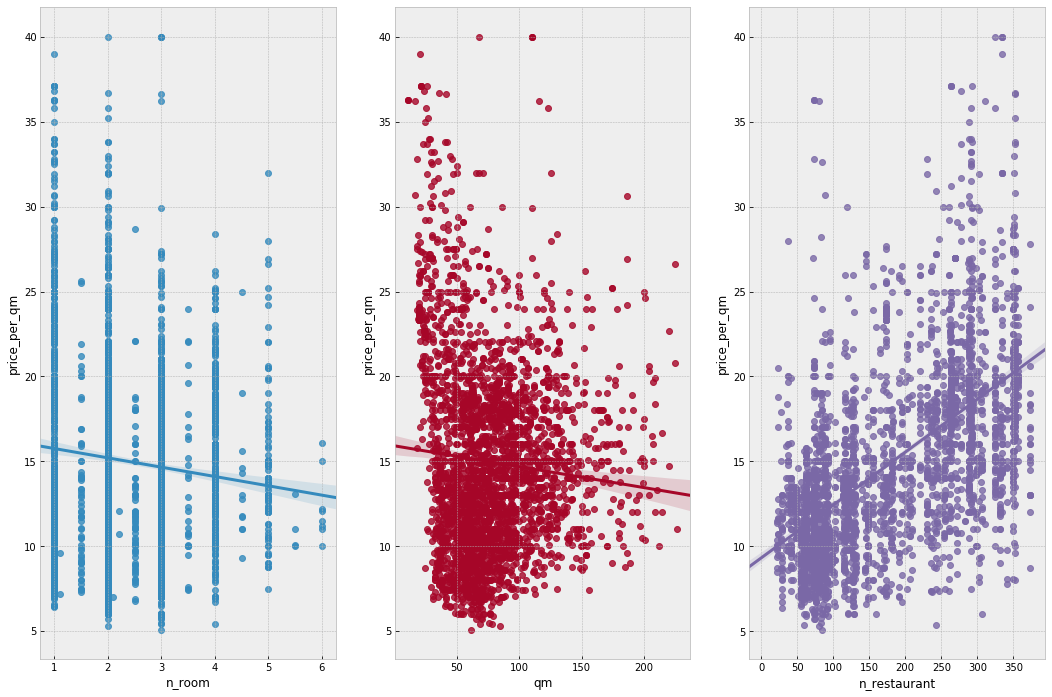

In [149]:
fig, ax = plt.subplots(round(len(features_to_analyse) / 3), 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse) - 1:
        sns.regplot(x=features_to_analyse[i],y='price_per_qm', data=df_num[features_to_analyse], ax=ax)

In [ ]:
plt.figure(figsize = (10, 6));
ax = sns.boxplot(x='marketingType', y='price_per_qm', data=df);
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k");
plt.xticks(rotation=45);

In [153]:
df_analysis = df_num["n_restaurant","price_per_qm"]

KeyError: ('n_restaurant', 'price_per_qm')

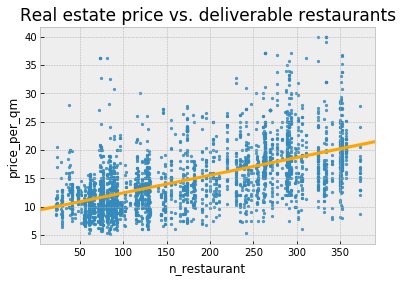

In [151]:
g = (sns.regplot(data = df_num.reset_index(),
                 x = 'n_restaurant',
                 y = 'price_per_qm',
                 line_kws = {"color": "orange"},
                 scatter_kws ={"s": 5}))
g.set_title("Real estate price vs. deliverable restaurants", fontsize = 17);

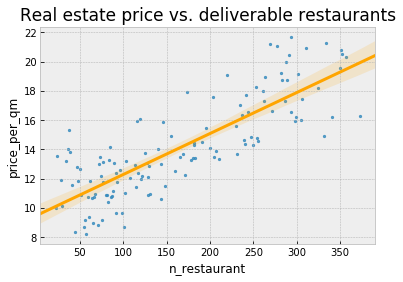

In [154]:
df_analysis = df_num.groupby(["n_restaurant"]).mean()
df_analysis = df_analysis[["price_per_qm"]]
g = (sns.regplot(data = df_analysis.reset_index(),
                 x = 'n_restaurant',
                 y = 'price_per_qm',
                 line_kws = {"color": "orange"},
                 scatter_kws ={"s": 5}))
g.set_title("Real estate price vs. deliverable restaurants", fontsize = 17);

In [156]:
plt.savefig("rent.png")

<Figure size 432x288 with 0 Axes>